# <center> <font color='green'> <b> Data Preprocessing with Pandas and ScikitLearn </b> </font> </center>

## <font color='blue'> Table of contents </font>
- [1 - Objectives](#1)
- [2 - Modules](#2)
- [3 - Data Exploration](#3)
- [4 - Preprocessing](#4)
- [5 - Build, compile and train a model](#5)

<a name="1"></a>
## <b> <font color=' #16a085'> 1. Objectives  </b> </font>

Practice with data exploration and preprocessing



<a name="1"></a>
## <b> <font color=' #16a085'> 2. Modules  </b> </font>

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf

<a name="3"></a>
## <b> <font color=' #16a085'> 3. Data Exploration  </b> </font>

### Loading data

In [5]:
df = pd.read_csv('data/salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M


### Exploration

In [6]:
# shape of the dataset
df.shape

(1195, 11)

There are 1195 rows and 11 columns in the dataset.

In [7]:
# see the columns
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
# see the type of each column
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Let' see if there are null values.

In [9]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
# we can convert a type, for example, we can convert "salary" to float
df["salary"] = df["salary"].astype("float64")
df["salary"].dtype

dtype('float64')

In [11]:
# stadistics for numerical features
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1195.000000,1.195000e+03,1195.000000,1195.000000
mean,2021.684519,2.495210e+05,122041.142259,66.736402
std,0.584604,1.136720e+06,66487.800833,44.035085
min,2020.000000,2.324000e+03,2324.000000,0.000000
25%,2021.000000,8.000000e+04,73961.000000,0.000000
50%,2022.000000,1.300000e+05,120000.000000,100.000000
75%,2022.000000,1.755500e+05,160237.500000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


Now, let' see statistics for non numerical features (experience level in this example)

In [12]:
category_stats = df['experience_level'].describe()
category_stats

count     1195
unique       4
top         SE
freq       702
Name: experience_level, dtype: object

In [13]:
# Get the frequency of unique values in the 'Category' column
category_counts = df['experience_level'].value_counts()
print(category_counts)

SE    702
MI    314
EN    138
EX     41
Name: experience_level, dtype: int64


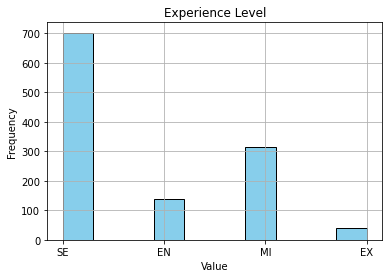

In [14]:
# Plot histogram for the selected column
plt.hist(df["experience_level"], bins=10, color='skyblue', edgecolor='black')
plt.title('Experience Level')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

<a name="4"></a>
## <b> <font color=' #16a085'> 4. Pre-processing  </b> </font>

We can eliminate some features if they are not important.

For example, given that we already have the salary in a common currency, the columns salary and salary_currency are not relevant


In [15]:
df.drop(['salary_currency','salary'], axis=1, inplace=True)

In [16]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

We are going to rename the column 'salary_in_usd' to 'salary'.

In [17]:
# we can rename a column
df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

### Missing values

In [18]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There aren't any, but if there is, a guide to dealing with them is as follows:


1. **Identify Missing Values:**
   - Use methods like `isnull()` or `isna()` to identify missing values in your dataset.
   - Visualize missing values using tools like heatmap or bar charts to understand their distribution across features.


2. **Understand the Nature of Missingness:**
   - Determine whether the missing values are missing completely at random (MCAR), missing at random (MAR), or missing not at random (MNAR).


3. **Handle Missing Values:**
   - **Delete Rows or Columns:**
      - Use `dropna()` to drop rows or columns with missing values.
   - **Imputation:**
      - **Mean/Median/Mode Imputation:** Replace missing values with the mean, median, or mode of the feature.
      - **Constant Imputation:** Replace missing values with a constant value, such as 0 or -1.
      - **Forward/Backward Fill:** Fill missing values with the preceding (forward fill) or succeeding (backward fill) non-null value.
      - **Interpolation:** Use interpolation techniques, such as linear interpolation, to estimate missing values based on neighboring values.
      - **Predictive Imputation:** Use machine learning models to predict missing values based on other features in the dataset.
      - **Advanced Techniques:** Consider advanced techniques like Multiple Imputation by Chained Equations (MICE) for handling complex missing data patterns.


4. **Evaluate Impact:**
   - Evaluate the impact of your chosen handling strategy on the distribution and integrity of the data.
   - Monitor changes in statistical properties, feature distributions, and model performance after handling missing values.


5. **Document Handling Process:**
   - Document your approach to handling missing values, including the rationale behind your decisions.
   - Document any transformations or imputations made to the dataset for reproducibility and transparency.


6. **Iterate and Refine:**
   - Evaluate the effectiveness of your handling strategy and refine as needed.
   - Consider iterating through different strategies to find the most suitable approach for your dataset and analytical goals.




### Separate between features and labels

The label will be the salary.

As this is merely an illustrative example, we will only keep a few characteristics for what follows, where the goal is to demonstrate how to divide the dataset and how to deal with both categorical and numerical features.

In [42]:
X = df[['experience_level', 'company_location', 'job_title', 'remote_ratio']]
y = df['salary']

type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [21]:
X.head(3)

,experience_level,company_location,job_title,remote_ratio
0,SE,GB,Marketing Data Analyst,100
1,EN,CA,Data Scientist,100
2,SE,US,Data Science Lead,50


In [22]:
y.head(3)

0    200000
1     74378
2    165000
Name: salary, dtype: int64

### Train/Test split

In [43]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((956, 4), (239, 4), (956,), (239,))

### Dealing with features

In [25]:
X.dtypes

experience_level    object
company_location    object
job_title           object
remote_ratio         int64
dtype: object

To train a ML model:

- Categorical variables must be converted into numerical features. For this, we have 2 options:
  - Label encoding
  - One-hot encoding

In a simplistic manner, when there is a relevant order, we should use label encoding, and when there isn't, one-hot encoding.

- It is usually convenient to normalize numerical features.


In this example, we will encode:

- **experience_level**
  - With label encoding, as there is a clear order (senior is higher than entry-level, for example).


- **company_location**
  - We will use one-hot encoding, as there is no clear order a priori.


- **job_title**
  - Although there could be an order (depending on the type of company, some titles are worth more than others), here for simplicity, we will assume there isn't, and we will use one-hot encoding.


- **remote_ratio**
  - It is numeric, so we will normalize it.



To facilitate preprocessing, we will use the tools [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) and [make_column_transformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) from ScikitLearn.

For label encoding, we should use LabelEncoder(), which at the time of writing this text, does not work with make_column_transformer. Therefore, we will perform this transformation separately.



In [44]:
# label encoding

# define the specific order
order = ['EN','MI', 'SE', 'EX']

# initialize the label encoder
label_encoder = LabelEncoder()
label_encoder.fit(order)

# Encode the feature 'experience' in the training set.
X_train.loc[:, 'experience_level'] = label_encoder.transform(X_train['experience_level'])

# Encode the feature 'experience' in the test set.
X_test.loc[:, 'experience_level'] = label_encoder.transform(X_test['experience_level'])



In [45]:
# see the mapping
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
mapping

{'EN': 0, 'EX': 1, 'MI': 2, 'SE': 3}

In [47]:
X_train.head(3)

,experience_level,company_location,job_title,remote_ratio
939,3,BE,Machine Learning Engineer,50
545,2,GB,Data Engineer,0
76,2,US,Data Manager,0


We can see that now the column 'experience_level' is numerically encoded.

In [49]:
X_train.shape

(956, 4)

Now, let's encode the rest of the features.

In [51]:
# lists with each type of feature

features_num = ['remote_ratio']

features_cat_onehot = ['company_location', 'job_title']


In [52]:
# for numerical features
transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)

# for categorical features with one-hot
transformer_cat_onehot = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore', sparse=False),
)

# make_column_:transfoerm -> Construct a ColumnTransformer from the given transformers.
preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat_onehot, features_cat_onehot),
    remainder='passthrough'  # No transformar las columnas que no estén explícitamente especificadas
)

In [53]:
X_train = preprocessor.fit_transform(X_train) # fit and transform
X_test = preprocessor.transform(X_test) # only transform

In [54]:
type(X_train), X_train.shape

(numpy.ndarray, (956, 117))

We can see that now X_train does not have dimensions (956, 4) but (956, 117). This is due to the one-hot encoding of 'company_location' and 'job_title'.

In [55]:
X_train[:2]

array([[-0.3591765 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

For visualization purposes, we will create a DataFrame from X_train.

In [59]:
aux = pd.DataFrame(X_train)
aux.head(3)

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,-0.359177,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,-1.488692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,-1.488692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


We can see that in column 0, we have 'remote_ratio' (standardized), in column 116 we have 'experience_level' (label encoded), and the remaining columns correspond to the one-hot encoding of 'company_location' and 'job_title'

<a name="5"></a>
## <b> <font color=' #16a085'> 5. Build, compile and train a model </b> </font>

To test that everything has gone well, we will train a simple model


In [61]:
def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128,input_shape=[input_shape]),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dense(64),
        tf.keras.layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [62]:
model = build_model(X_train.shape[1])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               15104     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 56,449
Trainable params: 56,449
Non-trainable params: 0
_________________________________________________________________


In [63]:
history = model.fit(
        X_train,y_train,
        validation_split=0.2,
        epochs=20,
        verbose=0
)

In [64]:
scores = model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 4ms/step - loss: 2504233728.0000 - mae: 32866.6250 - mse: 2504233728.0000


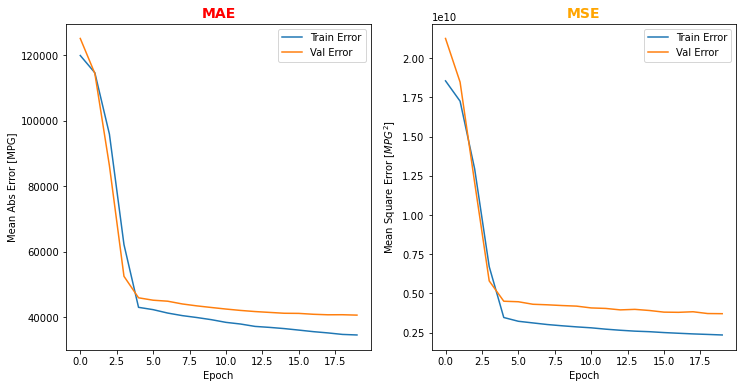

In [65]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    # Create a figure with two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

    axs[0].set_title('MAE',fontsize=14, fontweight='bold',color='red')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Mean Abs Error [MPG]')
    axs[0].plot(hist['epoch'], hist['mae'],
           label='Train Error')
    axs[0].plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    axs[0].legend()


    axs[1].set_title('MSE',fontsize=14, fontweight='bold',color='orange')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Mean Square Error [$MPG^2$]')
    axs[1].plot(hist['epoch'], hist['mse'],
           label='Train Error')
    axs[1].plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    axs[1].legend()

plot_history(history)